In [3]:
import pandas as pd

df = pd.read_csv('Trackitt_data_table_3.csv') # argument - path to the file  
data_head = df.head(2)  
#print(df.shape)
#print(data_head) 

In [4]:
# preprocessing
if df['More'].isnull().sum() == df.shape[0]:
    del df['More']
if df['Watch'].isnull().sum() == df.shape[0]:
    del df['Watch']
    
df.dropna(subset=['Comments'], inplace=True)
df['Comments'] = df['Comments'].fillna('unknown')
df['Applicant Type'] = df['Applicant Type'].fillna('unknown')    

df_approved = df[df['Application Status'] == 'approved']
print(df_approved['Total Processing Time'].isnull().sum())
print(df_approved.shape[0])

2170
29455


In [22]:
#=================================================================
# 1. Does it changes in 5 last years in comparing with last year?
# see records only 2019
# see records only in five years, only 2019, only 2018 
#=================================================================
          
#lstyer = [2015, 2016, 2017, 2019, 2019]
#for yeard in lstyer:
#    df_approved_2015_2019 = df_approved[df_approved['Approval/Denial Date'].dt.year == yeard]
#print(df_approved_2015_2019.shape[0])
pd.set_option('mode.chained_assignment', None)
df_approved = df_approved[['Category', 'Total Processing Time', 'Application Status','Approval/Denial Date']]
df_approved['Approval/Denial Date']= pd.to_datetime(df_approved['Approval/Denial Date']) 
df_approved2019 = df_approved[(df_approved['Approval/Denial Date'].dt.year <= 2019) & (df_approved['Approval/Denial Date'].dt.year >= 2015)] 
df_approved2019.dropna(subset=['Category'], inplace=True)
df_approved2019['Total Processing Time'] = df_approved2019['Total Processing Time'].str.extract('(\d+)') # delete days from column
df_approved2019['Total Processing Time'] = df_approved2019['Total Processing Time'].replace(np.nan, 0)
df_approved2019['Total Processing Time'] = df_approved2019['Total Processing Time'].astype(int)

# print(df_approved2019['Total Processing Time'].isnull().sum())
#=================================================================

df_2019_categ = df_approved2019.groupby('Category')['Total Processing Time'].mean()
df_2019_categ =pd.to_numeric(df_2019_categ)
list_categ = sorted(df_approved2019['Category'].unique())

df_2019_categ.index = list_categ
#df_2019_categ.plot(kind='bar')

# conclusions: we can see that the statistics do not change much for each of the categories

NameError: name 'fig' is not defined

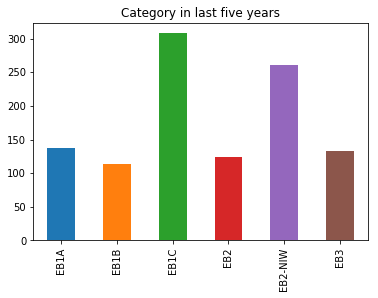

In [26]:
df_2019_categ.plot(kind='bar',title='Category in last five years')

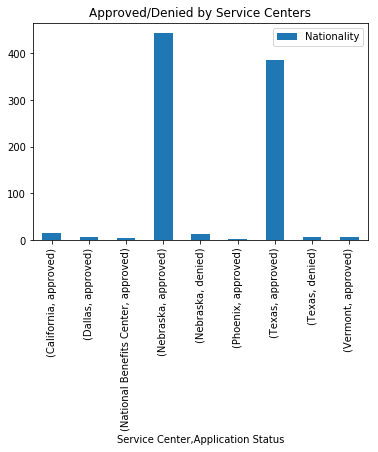

In [25]:
#=================================================================
# 2. would like to know how many approved/denied applications
#=================================================================
df['Approval/Denial Date']= pd.to_datetime(df['Approval/Denial Date'])
df2019 = df[df['Approval/Denial Date'].dt.year == 2019]
df_center = df2019[['Service Center', 'Application Status', 'Nationality']]

value_counts = df2019['Service Center'].value_counts()
#df1 = df[(df_center['Service Center'] == 'Nebraska') & (df_center['Application Status'] == 'approved')]
df_persent = df_center.groupby(['Service Center','Application Status']).count()
df_persent.plot(kind='bar', title='Approved/Denied by Service Centers')
# conclusions: found extra service сenters, you need to clarify why there are extra cities